In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## EDA
### Basic Situation

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


In [226]:
#Check for any null values
train.isnull().sum()
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

#### Basic Situation Summary
    1. Only 'Product_Category_2' & 'Product_Category_3' are only columns with missing data
    2. 10 features consist of 5 categorical columns and 6 numeric columns

In [238]:
'''gender = {'F':0, 'M':1}

train['Gender'] = train['Gender'].map(gender)
test['Gender'] = test['Gender'].map(gender)

train = train.rename(columns={'Gender': 'isMale'})
test = test.rename(columns={'Gender': 'isMale'})'''

In [239]:
'''train['Age'] = train['Age'].factorize()[0]
test['Age'] = test['Age'].factorize()[0]'''

In [242]:
'''city = {'A': 1, 'B': 2, 'C':3}

train['City_Category'] = train['City_Category'].map(city)
test['City_Category'] = test['City_Category'].map(city)'''

In [246]:
'''train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].factorize()[0]
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].factorize()[0]'''

### Missing Data

In [227]:
#Fill the null values with 0 cause there is no 0 in Category 2 & Category 3
train.fillna(0, inplace= True)
test.fillna(0, inplace= True)

In [228]:
#double Check for any null values
train.isnull().sum().max()
test.isnull().sum().max()

0

0

### Univariate Analysis

In [53]:
# focus is my target value
train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [41]:
#standardizing target value
from sklearn.preprocessing import StandardScaler
purchase_sca = StandardScaler().fit_transform(train['Purchase'][:,np.newaxis])
low_range = purchase_sca[purchase_sca[:,0].argsort()][:10]
high_range= purchase_sca[purchase_sca[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]]

outer range (high) of the distribution:
[[2.92531422]
 [2.92551331]
 [2.92551331]
 [2.92571239]
 [2.92571239]
 [2.92571239]
 [2.92571239]
 [2.92591147]
 [2.92591147]
 [2.92591147]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


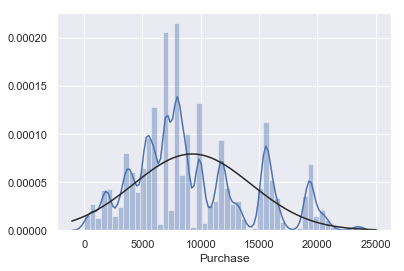

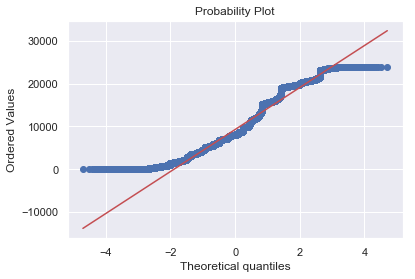

In [44]:
# Check distribution of target value & its probability plot
from scipy.stats import norm
from scipy import stats

sns.distplot(train['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train['Purchase'], plot=plt);

#### Univariate Analysis Summary
Based on graph above, we can find our target 'Purchase' is hugely skewed, try to split data before 15000 and after into two datasets

In [204]:
train_small=train.loc[train['Purchase'] <15000] 

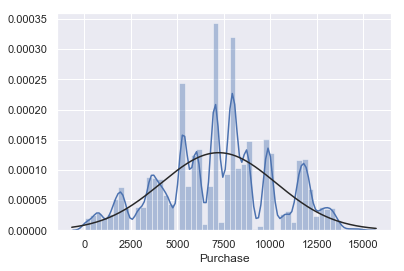

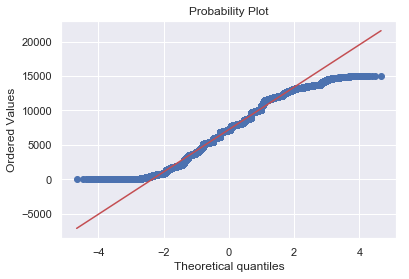

In [205]:
sns.distplot(train_small['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train_small['Purchase'], plot=plt);

In [188]:
train_middle=train.loc[(train['Purchase'] > 15000) & (train['Purchase'] < 18000)] 

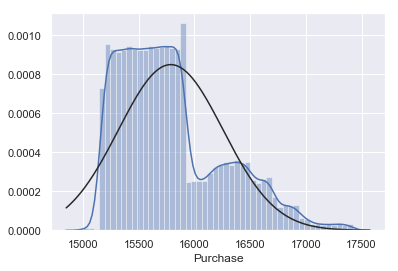

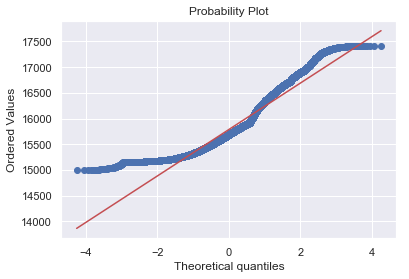

In [175]:
sns.distplot(train_middle['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train_middle['Purchase'], plot=plt);

In [189]:
# Split data before or after 15000
#cutoff_purchase = np.percentile(train['Purchase'], 99.9)  # 99.9 percentile (6 sigma in normal)
train_big=train.loc[train['Purchase'] >18000 ] 

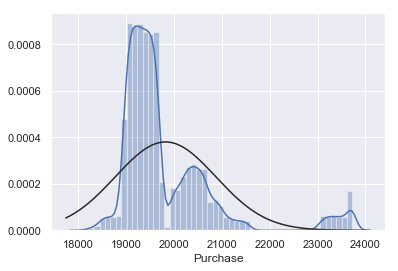

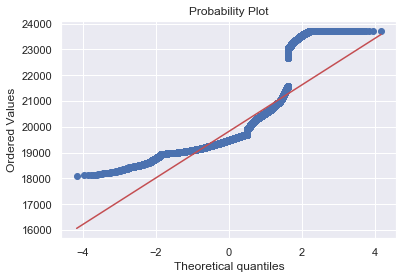

In [173]:
sns.distplot(train_big['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train_big['Purchase'], plot=plt);

### Multivariate Analysis

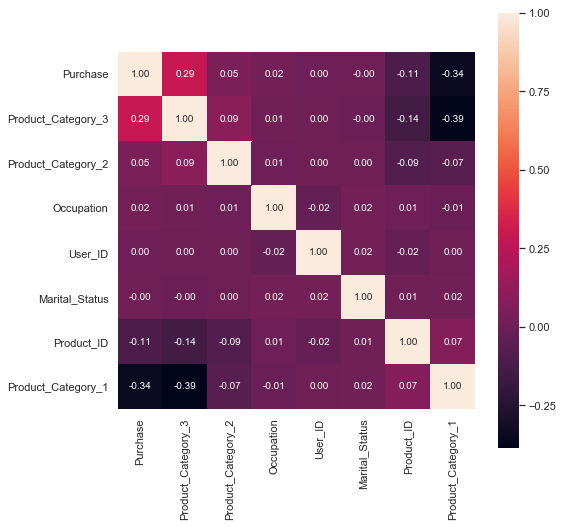

In [86]:
import seaborn as sns

k = 12 #number of variales for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'Purchase')['Purchase'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


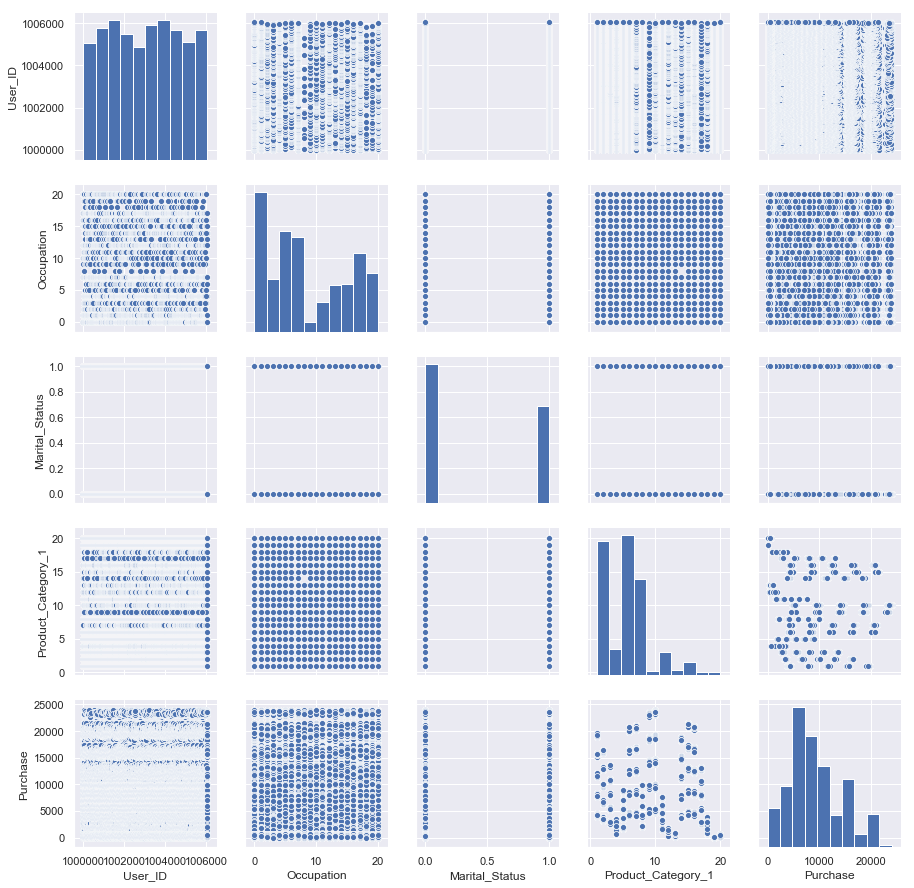

In [229]:
sns.pairplot(train, size=2.5)
plt.show();

#### Multivariate Analysis Summary
    1. Heatmap: correlation between features or between feature and target is not strong
    2. Pairplot: no linear relationship between feature and target
    3. overall, based on graph above, none of these techniques apply here, also confirmed that our data is better for non-linear model

# Understand Feature

In [206]:
from featexp import get_univariate_plots

In [251]:
train.dtypes

User_ID                         int64
Product_ID                     object
isMale                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [252]:
test.dtypes

User_ID                         int64
Product_ID                     object
isMale                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

                                     Plots for Product_Category_1                                     


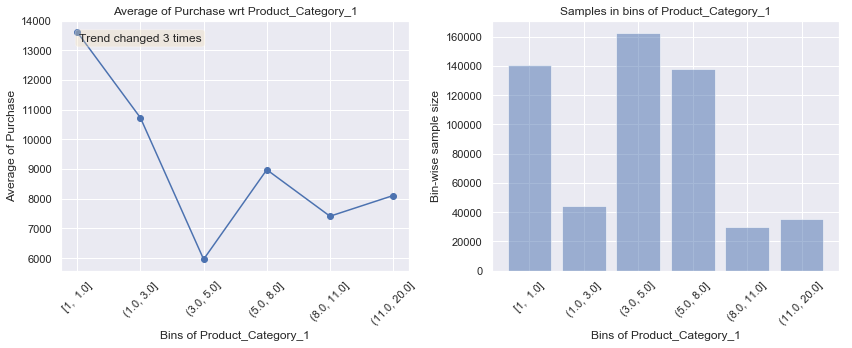

--------------------------------------------------------------------------------------------------------------




In [221]:
get_univariate_plots(data=train, target_col='Purchase', 
                     features_list=['Product_Category_1'], bins=10)

## Model Fit

### Preprocess Data

In [109]:
feature_=train.drop(columns={'Purchase'},axis=1)
target=train.Purchase

In [112]:
#Convert all the feature columns to string 
feature_ = feature_.applymap(str)
#test = test.applymap(str)
feature_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null object
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null object
Product_Category_1            550068 non-null object
Product_Category_2            550068 non-null object
Product_Category_3            550068 non-null object
dtypes: object(11)
memory usage: 46.2+ MB


In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for fe in feature_.columns:
    feature_[fe] = le.fit_transform(feature_[fe])

In [116]:
feature_.dtypes

User_ID                       int64
Product_ID                    int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
dtype: object

### Feature Selection

In [121]:
# since Product_Category_2 & Product_Category_3 are somehow correlated with Product_Category_1
# Product_Category_1 has biggest correlation with Purchase, let's only use Product_category_1
feature_.drop(columns={'Product_Category_2','Product_Category_3'},axis=1,inplace=True)

1. XGBoost

In [131]:
import xgboost as xgb
# conver data to DMatrix for xgb
dmatrix= xgb.DMatrix(feature_.values, label=target, missing=np.nan)

In [134]:
untuned_xgb_param = {'objective': 'reg:linear', 'booster': 'gbtree', 'silent': 1,
        'max_depth': 8, 'eta': 0.1, 
        'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 10,
        'metrics':'rmse'}

In [ ]:
untuned_cv_rmse=xgb.cv(dtrain=dmatrix, params=untuned_xgb_param, nfold=5, seed=123, num_boost_round=690, early_stopping_rounds=10)
untuned_cv_rmse

In [139]:
untuned_cv_rmse['test-rmse-mean'].mean()

2658.6225898055122

In [160]:
# apply untuned hyperparameters to model to fit (better cv results)
xgb_reg=xgb.XGBRegressor(objective='reg:linear', booster='gbtree',
        max_depth= 8, eta= 0.1, 
        subsample=0.8, colsample_bytree=0.8, min_child_weight=10,
        )

In [161]:
xgb_reg.fit(feature_, target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

Text(0,0.5,'Feature Importance Score')

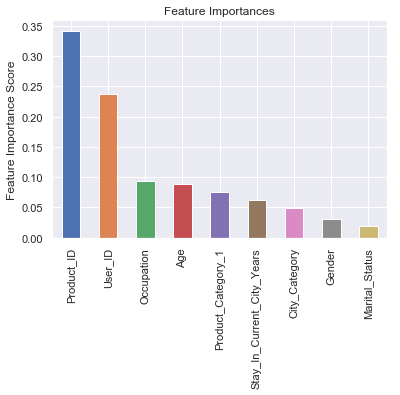

In [162]:
feat_imp = pd.Series(xgb_reg.feature_importances_, index=feature_.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

Tune Hyperparameters

In [144]:
from sklearn.model_selection import RandomizedSearchCV
xgb_param_grid = {
    'learning_rate':np.arange(0.05,0.15,0.05),
    'max_depth':np.arange(8,12,2),
    'subsample':np.arange(0.7,0.8,0.1),
    'colsample_bytree':np.arange(0.7,0.8,0.1)
}

In [145]:
xgbm=xgb.XGBRegressor()
randomized_mse = RandomizedSearchCV(estimator=xgbm, param_distributions=xgb_param_grid, n_iter=10, scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=-1)
randomized_mse.fit(feature_, target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': array([0.05, 0.1 ]), 'max_depth': array([ 8, 10]), 'subsample': array([0.7, 0.8]), 'colsample_bytree': array([0.7, 0.8])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=1)

In [146]:
tuned_rmse=np.sqrt(np.abs(randomized_mse.best_score_))
tuned_rmse

2746.372226037044

In [149]:
randomized_mse.best_params_

{'subsample': 0.7,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [147]:
randomized_mse.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

2. GBM

In [153]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(learning_rate=0.1,
                                n_estimators=690,
                                max_depth=8,
                                subsample=0.8,
                                random_state=123)

In [155]:
untuned_bgm_mse_cv = -cross_val_score(gbt, feature_, target, verbose=1,scoring='neg_mean_squared_error',cv=5, n_jobs=-1)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 58.9min finished


In [163]:
untuned_bgm_rmse_cv=np.sqrt(untuned_bgm_mse_cv)
print(untuned_bgm_rmse_cv.mean())

2604.969392833252


Further Feature Selection

In [ ]:
#feature_further = feature_.drop(columns={''})

3. SGB

In [ ]:
sgbt = GradientBoostingRegressor(
                                learning_rate=0.1,
                                n_estimators=690,
                                max_depth=8,
                                subsample=0.8,
                                random_state=123)